<a href="https://colab.research.google.com/github/Ananya45678/Machine-Learning-Codes/blob/main/ML_lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Description:**

The Wine Dataset is commonly used for classification models such as Predicting wine type based on chemical composition and is available in the UCI Machine Learning Repository.
It has 178 Samples, 13 Features, 1 Class variable.

Features: Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanidins, Clor intensity, Hue, OD280/OD315 of diluted wines, Proline.

Class variable: 3 different types of wines classified as Type 1, Type 2, Type 3.

Dataset Link: https://archive.ics.uci.edu/dataset/109/wine

In [48]:
from google.colab import files
uploaded = files.upload()

Saving wine_data.csv to wine_data (1).csv


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

**QUESTION 1.**

Evaluate the intraclass spread and interclass distances between the classes in your dataset. If
your data deals with multiple classes, you can take any two classes

Calculate the mean for each class.

In [50]:
df = pd.read_csv('wine_data.csv')
mean_cols = df.mean()
print(mean_cols)

class                             1.938202
alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
OD280_OD315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64


Calculate spread (standard deviation) for each class
.

In [51]:
df = pd.read_csv('wine_data.csv')
spread_cols = df.std()
print(spread_cols)

class                             0.775035
alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_intensity                   2.318286
hue                               0.228572
OD280_OD315_of_diluted_wines      0.709990
proline                         314.907474
dtype: float64


Calculate the distance between mean vectors between classes


In [52]:
df = pd.read_csv('wine_data.csv')

class_1 = df[df['class'] == 1]
class_2 = df[df['class'] == 2]
class_3 = df[df['class'] == 3]

X_class_1 = class_1.drop(columns=['class'])
X_class_2 = class_2.drop(columns=['class'])
X_class_3 = class_3.drop(columns=['class'])

centroid1 = np.array(X_class_1.mean(axis=0))
centroid2 = np.array(X_class_2.mean(axis=0))
centroid3 = np.array(X_class_3.mean(axis=0))

distance_1_2 = np.linalg.norm(centroid1 - centroid2)
distance_1_3 = np.linalg.norm(centroid1 - centroid3)
distance_2_3 = np.linalg.norm(centroid2 - centroid3)

print(f"Euclidean distance between centroids of class 1 and class 2: {distance_1_2}")
print(f"Euclidean distance between centroids of class 1 and class 3: {distance_1_3}")
print(f"Euclidean distance between centroids of class 2 and class 3: {distance_2_3}")

Euclidean distance between centroids of class 1 and class 2: 596.3379580251424
Euclidean distance between centroids of class 1 and class 3: 485.90168455654964
Euclidean distance between centroids of class 2 and class 3: 110.61064078790011


**QUESTION 2.**

Take any feature from your dataset. Observe the density pattern for that feature by plotting the
histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and
variance from the available data.

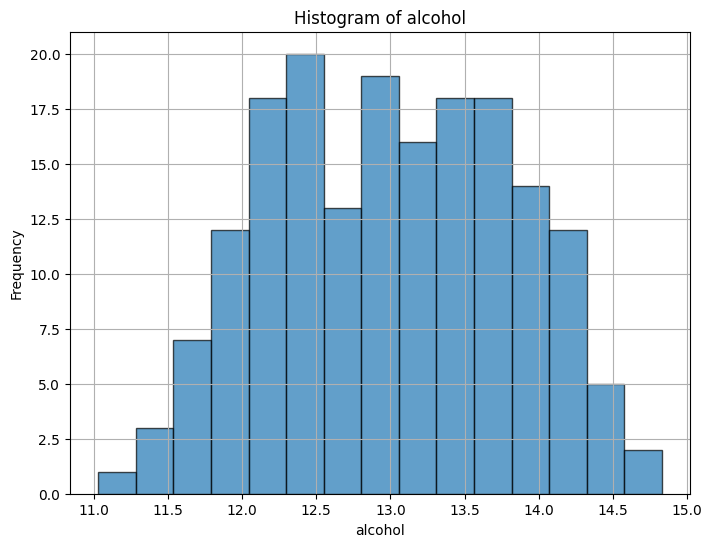

Mean of alcohol: 13.00061797752809
Variance of alcohol: 0.6553597304633259


In [53]:
df = pd.read_csv('wine_data.csv')

feature = 'alcohol'

plt.figure(figsize=(8, 6))
plt.hist(df[feature], bins=15, edgecolor='black', alpha=0.7)
plt.title(f"Histogram of {feature}")
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

mean = np.mean(df[feature])
variance = np.var(df[feature])

print(f"Mean of {feature}: {mean}")
print(f"Variance of {feature}: {variance}")

**QUESTION 3.**

Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1
to 10. Make a plot of the distance and observe the nature of this graph.

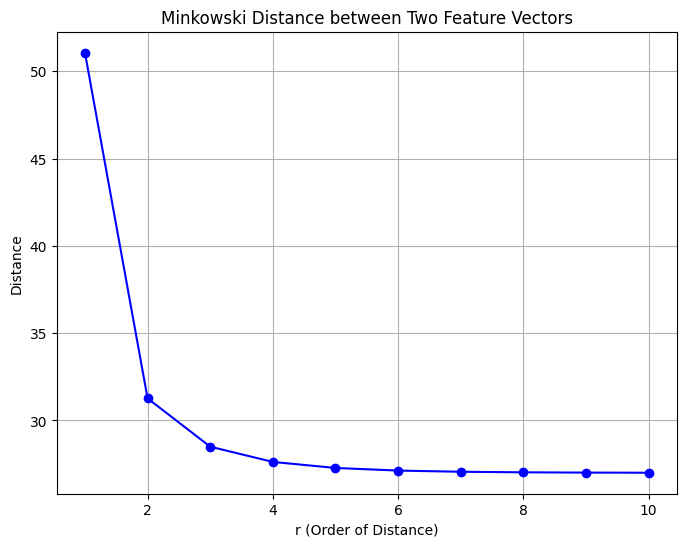

In [54]:
df = pd.read_csv('wine_data.csv')

vector1 = df.iloc[0, 1:].values
vector2 = df.iloc[1, 1:].values

def minkowski_distance(x, y, r):
    return np.sum(np.abs(x - y) ** r) ** (1/r)

r_values = np.arange(1, 11)
distances = [minkowski_distance(vector1, vector2, r) for r in r_values]

plt.figure(figsize=(8, 6))
plt.plot(r_values, distances, marker='o', linestyle='-', color='b')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.xlabel('r (Order of Distance)')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

**QUESTION 4.**

Divide dataset in your project into two parts – train & test set.

In [55]:
df = pd.read_csv('wine_data.csv')

X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 142 samples
Test set size: 36 samples


**QUESTION 5.**

Train a kNN classifier (k =3) using the training set obtained from above exercise.

In [56]:
df = pd.read_csv('wine_data.csv')

X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**QUESTION 6.**

Test the accuracy of the kNN using the test set obtained from above exercise.

In [57]:
y_pred = neigh.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 77.78%

Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.94      0.89        17
           2       0.70      0.64      0.67        11
           3       0.71      0.62      0.67         8

    accuracy                           0.78        36
   macro avg       0.75      0.73      0.74        36
weighted avg       0.77      0.78      0.77        36



**QUESTION 7.**

Use the predict() function to study the prediction behavior of the classifier for test vectors.
Perform classification for a given vector using neigh.predict(<<test_vect>>). This shall produce the
class of the test vector (test_vect is any feature vector from your test set).


In [58]:
test_vect = X_test.iloc[0:1]
predicted_class = neigh.predict(test_vect)
print(f"Predicted class for the test vector: {predicted_class[0]}")

Predicted class for the test vector: 1


**QUESTION 8.**

Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to
11 and make an accuracy plot.


([<matplotlib.axis.XTick at 0x783bf8c04a50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11')])

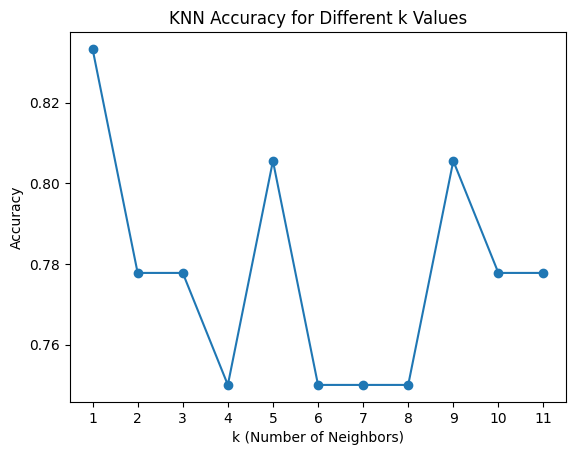

In [59]:
df = pd.read_csv('wine_data.csv')

X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

accuracy_scores = []

for k in range(1, 12):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

plt.plot(range(1, 12), accuracy_scores, marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 12))

**QUESTION 9.**

. Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).


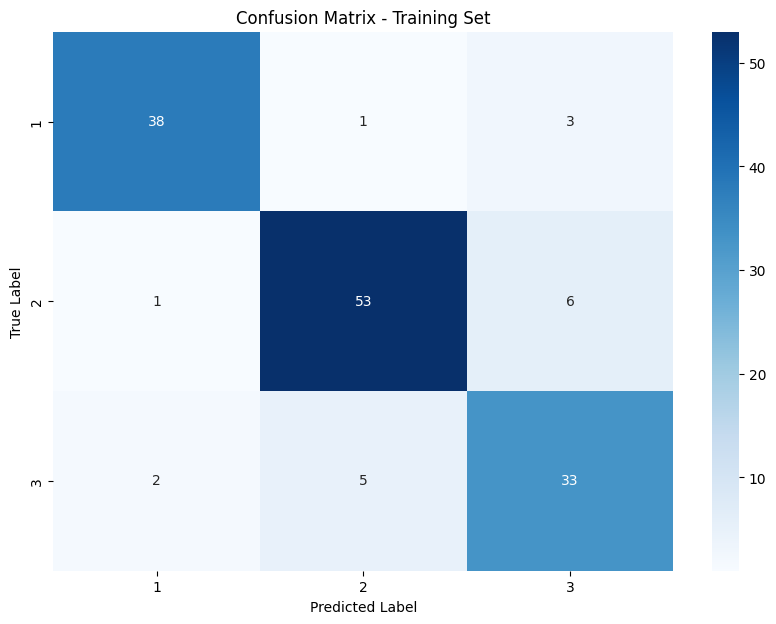

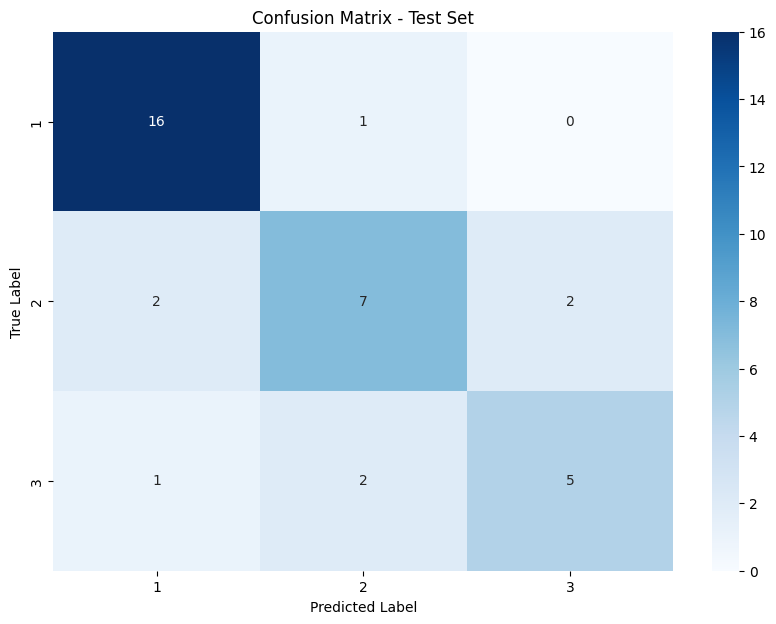


Classification Report (Training Set):
               precision    recall  f1-score   support

           1       0.93      0.90      0.92        42
           2       0.90      0.88      0.89        60
           3       0.79      0.82      0.80        40

    accuracy                           0.87       142
   macro avg       0.87      0.87      0.87       142
weighted avg       0.88      0.87      0.87       142


Classification Report (Test Set):
               precision    recall  f1-score   support

           1       0.84      0.94      0.89        17
           2       0.70      0.64      0.67        11
           3       0.71      0.62      0.67         8

    accuracy                           0.78        36
   macro avg       0.75      0.73      0.74        36
weighted avg       0.77      0.78      0.77        36


Accuracy for Training Set: 0.8732
Accuracy for Test Set: 0.7778


In [60]:
df = pd.read_csv('wine_data.csv')

X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nClassification Report (Training Set):\n", metrics.classification_report(y_train, y_train_pred))
print("\nClassification Report (Test Set):\n", metrics.classification_report(y_test, y_test_pred))

print(f"\nAccuracy for Training Set: {metrics.accuracy_score(y_train, y_train_pred):.4f}")
print(f"Accuracy for Test Set: {metrics.accuracy_score(y_test, y_test_pred):.4f}")